# Final Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = 'mountains_vs_beaches_preferences.csv'
df = pd.read_csv(dataset)

### check if there is missing data

In [3]:
missing_data = df.isnull().sum()
missing_data

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

### Create a correlation heat-map

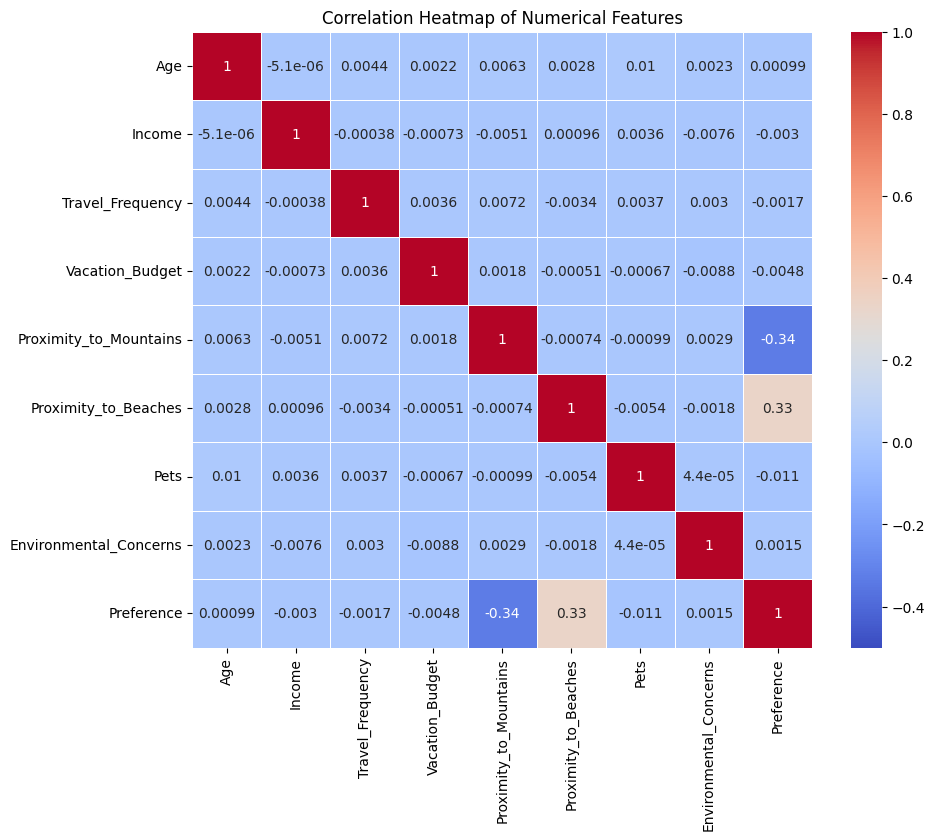

In [4]:
# Correlation heatmap for numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.5, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [5]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Vacation_Budget', 'Location',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season',
       'Pets', 'Environmental_Concerns', 'Preference'],
      dtype='object')

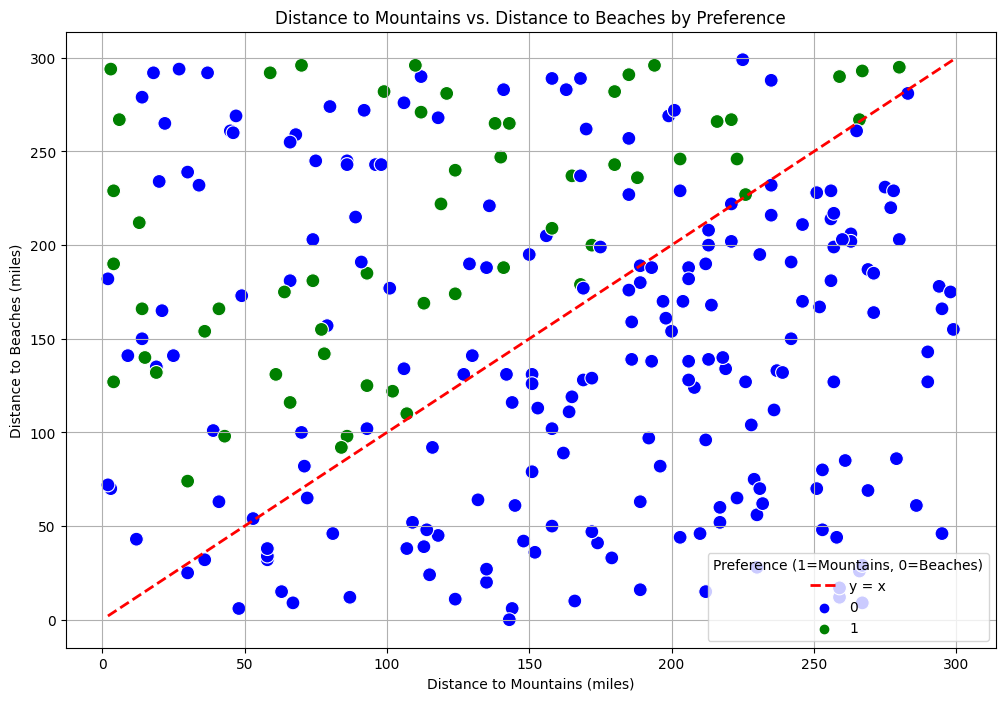

In [11]:
# Scatter plot: Distance to Mountains vs. Distance to Beaches, colored by preference
df_sampled = df.sample(frac=0.005, random_state=42)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_sampled, x='Proximity_to_Mountains', y='Proximity_to_Beaches', hue='Preference', palette={1: 'green', 0: 'blue'}, s=100)
plt.plot([df_sampled['Proximity_to_Mountains'].min(), df_sampled['Proximity_to_Mountains'].max()],
[df_sampled['Proximity_to_Mountains'].min(), df_sampled['Proximity_to_Mountains'].max()],
color='red', linestyle='--', linewidth=2, label='y = x')
plt.title('Distance to Mountains vs. Distance to Beaches by Preference')
plt.xlabel('Distance to Mountains (miles)')
plt.ylabel('Distance to Beaches (miles)')
plt.legend(title='Preference (1=Mountains, 0=Beaches)')
plt.grid(True)
plt.show()


### The scatter plot reveals that individuals who live close to both mountains and beaches (upper left area) show mixed preferences for mountains or beaches, while those living far from beaches but close to mountains (lower right area) predominantly prefer beaches. This pattern suggests that proximity influences vacation choices, but factors like the desire for environmental contrast, accessibility, and socioeconomic conditions also play significant roles.

In [7]:
from scipy.stats import chi2_contingency

df['closer_to_mountains'] = np.where(df['Proximity_to_Mountains'] - df['Proximity_to_Beaches'] > 0, 1, 0)
contingency_table = pd.crosstab(df['closer_to_mountains'], df['Preference'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
if p < alpha:
    print("Reject the null hypothesis: People closer to mountains have a statistically significant preference for beaches.")
else:
    print("Fail to reject the null hypothesis: There is no evidence that people closer to mountains prefer beaches more than by random chance.")



Chi-square statistic: 17495.05836823511
p-value: 0.0
Reject the null hypothesis: People closer to mountains have a statistically significant preference for beaches.


In [8]:
contingency_table

Preference,0,1
closer_to_mountains,,
0,13111,13148
1,26185,0


### We conducted a logistic regression analysis to determine if proximity to mountains influences vacation preference, assuming the data is independent and sufficiently representative. Logistic regression was chosen to model the binary outcome (preference) with a binary predictor (closer to mountains), as it is suitable for evaluating relationships between categorical variables. The p-value obtained was 0.0, indicating a statistically significant relationship, but the contingency table revealed an extreme imbalance, with no individuals closer to mountains preferring mountains. Given that the p-value is 0.0, we conclude that people closer to mountains have a statistically significant preference for beaches.

